# Функции ошибок

In [1]:
import numpy as np

**MSE**

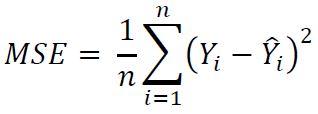

In [2]:
# MSE
def mean_squared_error(target, prediction) -> float:
  n = len(target)
  mse = sum((target - prediction)**2) / n
  return mse

**MAE**

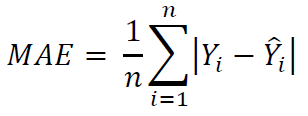

In [3]:
# MAE
def mean_ablosute_error(target, prediction) -> float:
  n = len(target)
  mae = sum(abs(target - prediction)) / n
  return mae

In [4]:
target = np.array([2.0, 3.2, 4, 3.3, 5, 6])
prediction = np.array([2.0, 3, 4.5, 2.3, 5, 5.5])

print(f'MSE = {mean_squared_error(target, prediction)}')
print(f'MAE = {mean_ablosute_error(target, prediction)}')

MSE = 0.25666666666666665
MAE = 0.3666666666666667


**F1-score**

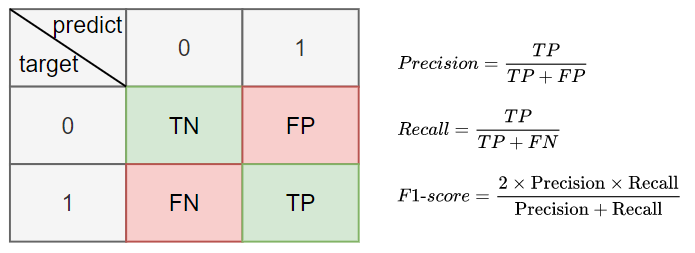

In [5]:
# F1-score
def f1_score(target, prediction) -> float:
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  n = len(target)
  for i in range(n):
    if target[i] == 1 and prediction[i] == 1:
      TP += 1
    if target[i] == 0 and prediction[i] == 0:
      TN += 1
    if target[i] == 1 and prediction[i] == 0:
      FN += 1
    if target[i] == 0 and prediction[i] == 1:
      FP += 1
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1 = 2 * precision * recall / (precision + recall)
  return f1

**Accuracy**

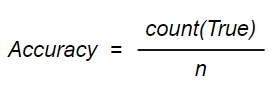

In [6]:
# Accuracy
def accuracy(target, prediction) -> float:
  n = len(target)
  t = 0 # правильные ответы
  for i in range(n):
    if target[i] == prediction[i]:
      t += 1
  accuracy = t / n
  return accuracy

In [7]:
target = np.array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
prediction = np.array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

print(f'F1-score = {f1_score(target, prediction)}')
print(f'Accuracy = {accuracy(target, prediction)}')

F1-score = 0.46153846153846156
Accuracy = 0.3


# Линейная регрессия с подбором параметров через градиентный спуск

In [8]:
import matplotlib.pyplot as plt

In [9]:
def linear_regression(x, y, learning_rate=0.0001, epochs=1000):
  n = len(x)
  w0 = 0
  w1 = 0
  for _ in range(epochs):
    y_pred = w0 + w1 * x
    dw0 = (-2 / n) * sum(y - y_pred) # производная MSE
    dw1 = (-2 / n) * sum(x * (y - y_pred))
    w0 -= learning_rate * dw0
    w1 -= learning_rate * dw1
  return w0, w1

In [10]:
x = np.array([1, 3, 5, 6, 7, 9, 10, 5, 8, 3])
y = np.array([2, 3, 5, 7, 8, 11, 13, 4, 6, 9])

w0, w1 = linear_regression(x, y)
print(f'w0 = {w0}')
print(f'w1 = {w1}')

w0 = 0.20520687976209318
w1 = 1.1190035185366007


In [11]:
y_pred = w0 + w1 * x
y_pred

array([ 1.3242104 ,  3.56221744,  5.80022447,  6.91922799,  8.03823151,
       10.27623855, 11.39524207,  5.80022447,  9.15723503,  3.56221744])

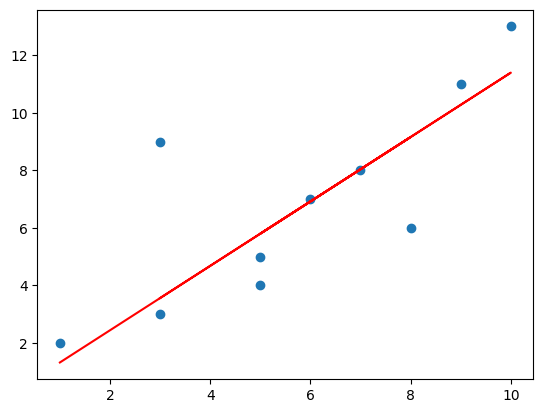

In [12]:
plt.plot(x, y_pred, color='red')
plt.scatter(x, y)
plt.show()